In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


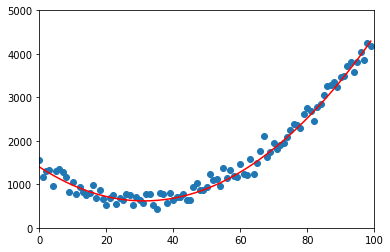

In [2]:
plt.xlim(0,100)
plt.ylim(0,5000)
line_coords = np.array([[x, 0.8*x**2 - 50*x + 1400] for x in range(100)])
dots_coords = np.array([line_coords[:,0], line_coords[:,1] + np.random.randn(len(line_coords)) * 149]).T
plt.plot(line_coords[:,0], line_coords[:,1],c="red");
plt.scatter(dots_coords[:,0], dots_coords[:,1]);

## Gradient Descent Method

In [3]:
def normalize_features(data, ref=None):
    if ref is None:
        ref = data
    ref_range = np.max(ref,0) - np.min(ref,0)
    ref_mean = np.mean(ref,0)
    data_norm = (data - ref_mean) / ref_range
    return np.concatenate([np.ones(len(data))[:,np.newaxis], [[x,x**2] for x in data_norm]],1)

**Hypothesis**

$h_{\theta}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^{2}$

In [4]:
def hypf(inputs, weights):
    return np.dot(inputs, weights)

**Cost Function**

$\displaystyle J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$

In [5]:
def costf(inputs, weights, outputs):
    return 0.5 * np.mean(np.square(hypf(inputs,weights) - outputs))

**Cost Partial Derivative**

$\displaystyle \frac{\partial}{\partial\theta_{j}}J(\theta) = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(\mathbf{x}^{(i)}) - y^{(i)})\mathbf{x}^{(i)}_{j}, J \in \{1,2,\dots,n\}$

In [30]:
def partials(inputs, weights, outputs):
    return np.mean((hypf(inputs,weights) - outputs) * inputs.T,1)

In [24]:
def updated_weights(inputs, weights, outputs, learning_rate):
    return weights - learning_rate * partials(inputs, weights, outputs)

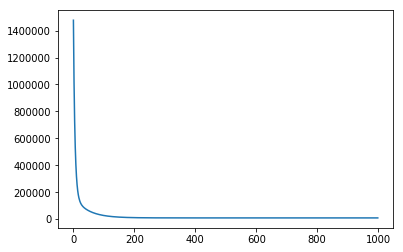

In [25]:
weights = [0,0,0]
learning_rate = 1.9
iterations = 1000
costs = np.empty(iterations)
inputs, outputs = dots_coords.T
inputs_norm = normalize_features(inputs)
for i in range(iterations):
    weights = updated_weights(inputs_norm, weights, outputs, learning_rate)
    costs[i] = costf(inputs_norm, weights, outputs)
plt.plot(np.arange(iterations), costs);

In [26]:
weights

array([  932.17697967,  2934.83830707,  7648.64211867])

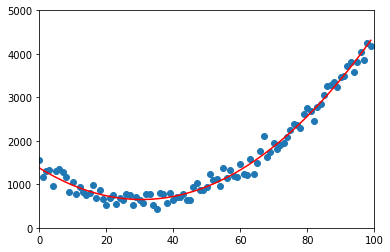

In [27]:
plt.xlim(0,100)
plt.ylim(0,5000)
#newline_coords = np.array([[x, np.dot([1,x,x**2], weights)] for x in range(100)])
newline_xs = range(100)
newline_ys = np.dot(normalize_features(newline_xs,inputs), weights)
plt.plot(newline_xs, newline_ys,c="red");
plt.scatter(dots_coords[:,0], dots_coords[:,1]);

## Normal Equation Method

In [28]:
x = np.concatenate([np.ones(len(inputs))[:,np.newaxis], [[x,x**2] for x in inputs]],1)
y = outputs
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

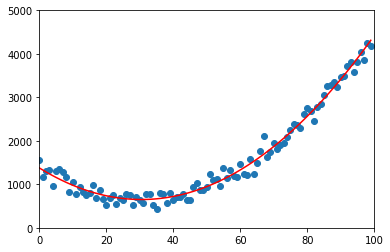

In [29]:
plt.xlim(0,100)
plt.ylim(0,5000)

newline_xs = range(100)
newline_ys = np.dot(np.concatenate([np.ones(len(newline_xs))[:,np.newaxis], [[x,x**2] for x in newline_xs]],1), w)
plt.plot(newline_xs, newline_ys,c="red");
plt.scatter(dots_coords[:,0], dots_coords[:,1]);